# (1) ANÁLISE EXPLORATÓRIA

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# => importação do dataset e transformação em data frame
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# => Ausência de calores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum().any(), df.isna().sum().any()

(False, False)

In [5]:
# Incluir coluna de target e classificação do target
def target_mapper(target):
    return breast_cancer.target_names[target]

df['target'] = breast_cancer.target
df['target_name'] = df['target'].apply(target_mapper)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [6]:
df.columns[:-2]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

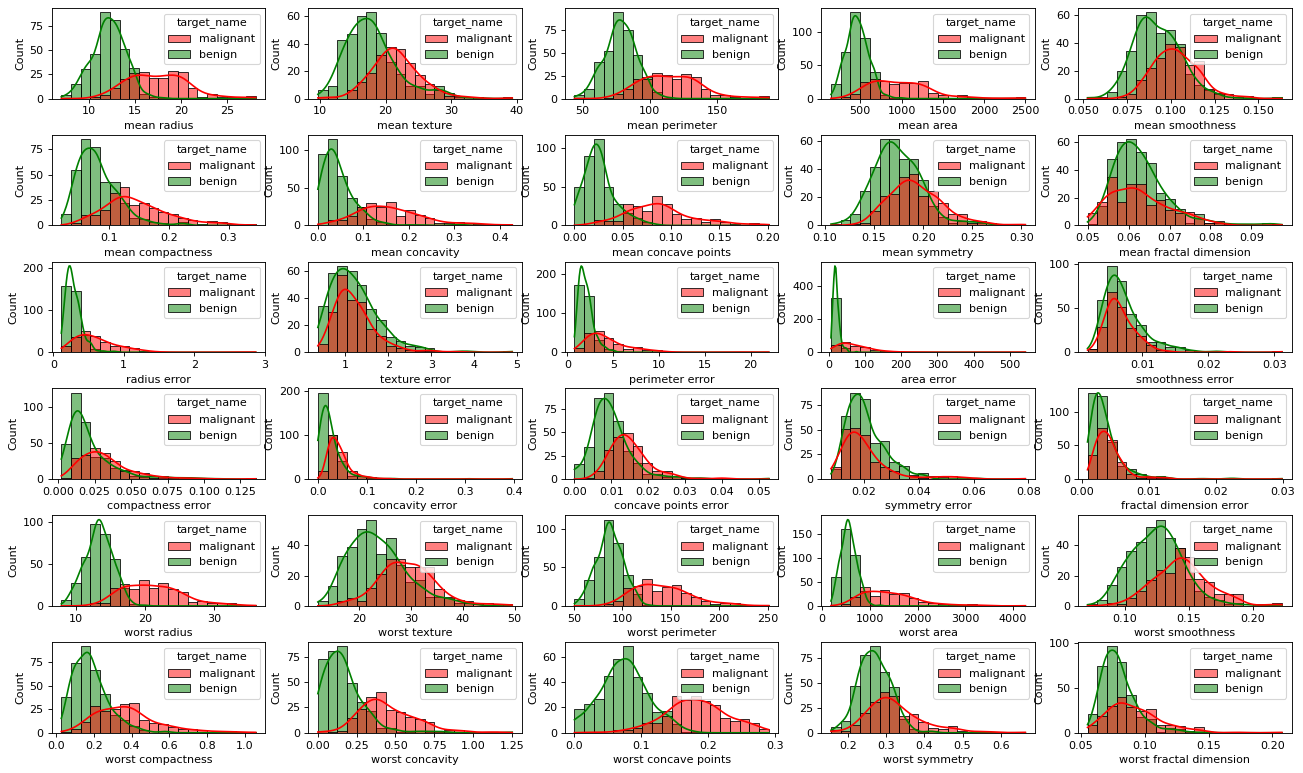

In [7]:
fig, axes = plt.subplots(6, 5, figsize=(20, 12), dpi=80)
k = 0

for i in range(6):
    for j in range(5):
        sns.histplot(ax=axes[i][j],
            data=df,
            x = df[df.columns[:-2][k]],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = df['target_name'],
            palette=["r", "g"]
            )
        k += 1


plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# (2) SEPARAÇÃO DOS DADOS

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(columns = ['target', 'target_name'])
y = df['target_name']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size = 0.20, 
    random_state = 42, 
    stratify=y
)

# (3) TRANSFORMAÇÃO DOS DADOS

### NORMALIZAÇÃO
##### Aplicada quando a distribuição dos dados não é normal ou se o desvio padrão dos mesmos for muito pequeno;
##### A normalização permite comparar a importância das features quando usamos modelos paramétricos como Regressão Linear e Regressão Logística.

### PADRONIZAÇÃO
##### Transforma os mesmos em uma distribuição normal padrão;
##### A padronização é recomendada quando os dados estão em uma distribuição normal.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
# NORMALIZAÇÃO
normalization = MinMaxScaler()
normalization.fit(x_train)

# Transformar os dados:
x_train_normalized = normalization.transform(x_train)
x_test_normalized = normalization.transform(x_test)

In [14]:
# PADRONIZAÇÃO
standardization = StandardScaler()
standardization.fit(x_train)

# Transformar os dados:
x_train_standardized = standardization.transform(x_train)
x_test_standardized = standardization.transform(x_test)

# (4) TREINAR ALGORITMO

## CLASSIFICADOR KNN
    • Calcular a distância entre pontos no espaço
    • Ele é não paramétrico, o que significa que ele não tem uma função clara definida a princípio
    • Parâmetro ajustável 𝑘 que controla quantos vizinhos são considerados durante a tarefa de classificação
    • k é um hiperparâmetro
    • O desempenho do algoritmo k-NN é altamente dependente da função distância escolhida

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# SEM TRANSFORMAÇÃO
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_knn_predict = knn.predict(x_test) 

# NORMALIZADO
knn.fit(x_train_normalized, y_train)
y_knn_predict_normalized = knn.predict(x_test_normalized) 

# PADRONIZADO
knn.fit(x_train_standardized, y_train)
y_knn_predict_standardized = knn.predict(x_test_standardized) 

### Hiperparâmetros para KNN -> para o dataset sem transformação

Text(0, 0.5, 'Mean Error')

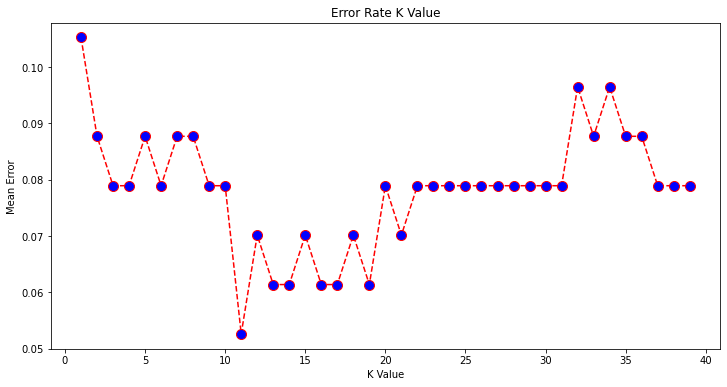

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parâmetros testados
param_grid = {'n_neighbors':[3,6,10,20,30],
              'weights': ['uniform', 'distance'],
              'metric':['cosine', 'euclidean', 'manhattan']
             }

# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring=gs_metric, cv=5, n_jobs=6, verbose=3)
grid.fit(x_train, y_train)
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNN {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'uniform'}


<Figure size 1080x360 with 0 Axes>

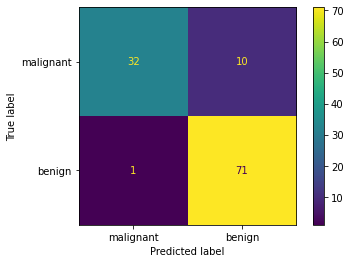

In [25]:
# Utilizando Hiperparâmetros
knn = KNeighborsClassifier(metric = 'cosine',
                           n_neighbors = 3,
                           weights = 'uniform')  

knn.fit(x_train, y_train) 

y_predicoes = knn.predict(x_test) 

matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=breast_cancer.target_names)

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=breast_cancer.target_names)
disp.plot(values_format='d') 

# (5) AVALIAR O DESEMPENHO
##### Para target categórico (Strings), utiliza-se as seguintes métricas:
- Matriz de confusão
- Precisão e Recall
- Acurácia
- F1 score
- Curva ROC

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve

## CLASSIFICADOR KNN

### Matriz de Confusão

In [27]:
matrix_knn = confusion_matrix(y_true = y_test,
                          y_pred = y_knn_predict,
                          labels=breast_cancer.target_names)

matrix_knn_normalized = confusion_matrix(y_true = y_test,
                                     y_pred = y_knn_predict_normalized,
                                     labels=breast_cancer.target_names)

matrix_knn_standardized = confusion_matrix(y_true = y_test,
                                       y_pred = y_knn_predict_standardized,
                                       labels=breast_cancer.target_names)

matrix_array = [matrix_knn, matrix_knn_normalized, matrix_knn_standardized]
matrix_names = ['Dataset', 'Normalized', 'Standardized']

# plotando uma figura com a matriz de confusao
#figure = plt.figure(figsize=(15, 5))
#disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=breast_cancer.target_names)
#disp.plot(values_format='d') 

Dataset


<Figure size 1080x360 with 0 Axes>

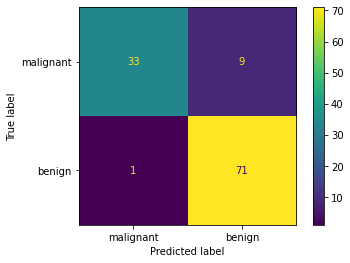

Normalized


<Figure size 1080x360 with 0 Axes>

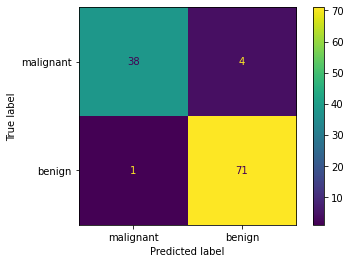

Standardized


<Figure size 1080x360 with 0 Axes>

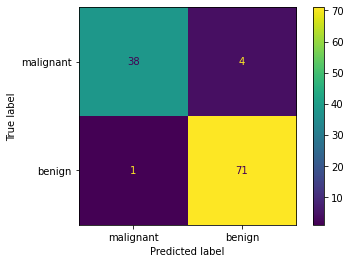

In [28]:
for i in range(len(matrix_array)):
    figure = plt.figure(figsize=(15, 5))
    print(matrix_names[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix_array[i], display_labels=breast_cancer.target_names )
    disp.plot(values_format='d')
    plt.show()

### Precisão - Recall - Acurácia - F1 Score

In [29]:
print(f'Dataset: \n{classification_report(y_test, y_knn_predict)}')
print(f'Normalized: \n{classification_report(y_test, y_knn_predict_normalized)}')
print(f'Standardized: \n{classification_report(y_test, y_knn_predict_standardized)}')

Dataset: 
              precision    recall  f1-score   support

      benign       0.89      0.99      0.93        72
   malignant       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

Normalized: 
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        72
   malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Standardized: 
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        72
   malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96   

### Coeficiente de Kappa Cohen

In [30]:
print(f'Dataset: \n{cohen_kappa_score(y_test, y_knn_predict)}')
print(f'Normalized: \n{cohen_kappa_score(y_test, y_knn_predict_normalized)}')
print(f'Standardized: \n{cohen_kappa_score(y_test, y_knn_predict_standardized)}')

Dataset: 
0.8037190082644627
Normalized: 
0.904330312185297
Standardized: 
0.904330312185297


## CLASSIFICADOR SVM
    • Aprendizado de máquina supervisionado
    • Se baseiam na ideia de separar os dados através de hiperplanos
    • O algoritmo de SVM quer encontrar os coeficientes 𝑎1, 𝑎2, 𝑎3, … , 𝑎𝑁 que definem o hiperplano de separação
    • Para encontrar os coeficientes, mais uma vez usamos um método de otimização em que queremos minimizar uma função custo
    • O parâmetro C cria o conceito de margem suave (soft) que é a ideia de permitir pequenas violações (alguns exemplos podem cair dentro da margem)
    • Consegue lidar com dados que não são linearmente separáveis usando um truque de kernel
    • A ideia é observar os dados em uma dimensão diferentes. Para realizar isso, o algoritmo aplica uma função sobre os dados chamada função de kernel. Varias são possíveis:
        – Kernel Linear;
        – Kernel Polinomial;
        – Kernel Função Base Radial (RBF);
        – Kernel Sigmoidal

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# SEM TRANSFORMAÇÃO
svm = SVC()
svm.fit(x_train, y_train)
y_svm_predict = svm.predict(x_test) 

# NORMALIZADO
svm.fit(x_train_normalized, y_train)
y_svm_predict_normalized = svm.predict(x_test_normalized) 

# PADRONIZADO
svm.fit(x_train_standardized, y_train)
y_svm_predict_standardized = svm.predict(x_test_standardized) 

### Avaliação SVM

Dataset


<Figure size 1080x360 with 0 Axes>

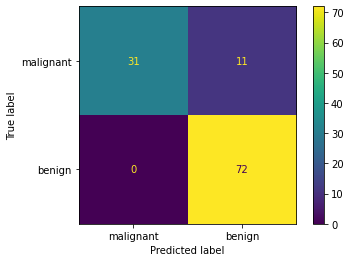

Normalized


<Figure size 1080x360 with 0 Axes>

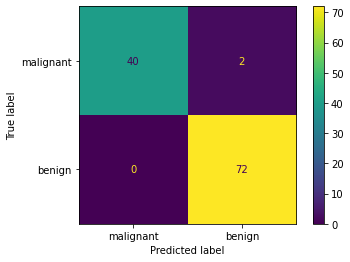

Standardized


<Figure size 1080x360 with 0 Axes>

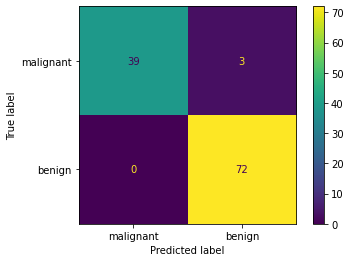

In [32]:
matrix_svm = confusion_matrix(y_true = y_test,
                          y_pred = y_svm_predict,
                          labels=breast_cancer.target_names)

matrix_svm_normalized = confusion_matrix(y_true = y_test,
                                     y_pred = y_svm_predict_normalized,
                                     labels=breast_cancer.target_names)

matrix_svm_standardized = confusion_matrix(y_true = y_test,
                                       y_pred = y_svm_predict_standardized,
                                       labels=breast_cancer.target_names)

matrix_array = [matrix_svm, matrix_svm_normalized, matrix_svm_standardized]
matrix_names = ['Dataset', 'Normalized', 'Standardized']

for i in range(len(matrix_array)):
    figure = plt.figure(figsize=(15, 5))
    print(matrix_names[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix_array[i], display_labels=breast_cancer.target_names )
    disp.plot(values_format='d')
    plt.show()

In [33]:
print(f'Dataset: \n{classification_report(y_test, y_svm_predict)}')
print(f'Coef Kappa de Cohen: {cohen_kappa_score(y_test, y_svm_predict)}')

Dataset: 
              precision    recall  f1-score   support

      benign       0.87      1.00      0.93        72
   malignant       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114

Coef Kappa de Cohen: 0.7806925498426023


In [34]:
print(f'Normalized: \n{classification_report(y_test, y_svm_predict_normalized)}')
print(f'Coef Kappa de Cohen: {cohen_kappa_score(y_test, y_svm_predict_normalized)}')

Normalized: 
              precision    recall  f1-score   support

      benign       0.97      1.00      0.99        72
   malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Coef Kappa de Cohen: 0.9619238476953907


In [35]:
print(f'Standardized: \n{classification_report(y_test, y_svm_predict_standardized)}')
print(f'Coef Kappa de Cohen: {cohen_kappa_score(y_test, y_svm_predict_standardized)}')

Standardized: 
              precision    recall  f1-score   support

      benign       0.96      1.00      0.98        72
   malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Coef Kappa de Cohen: 0.9425981873111783


## CLASSIFICADOR BAYESIANO
    • Modelo probabilístico que usam informações sobre a distribuição dos dados e a distribuição de probabilidade de pertencimento a cada classe
    • Utilizam as funções densidade de probabilidade (do inglês, Probability density function ou PDF). Elas são obtidas através de histogramas de distribuição dos dados
    • 
    • Podemos usar a regra de Bayes como função discriminante:
        – Gaussiana - GNB;
        – Linear - LDA;
        – Quadrático - QDA.

In [36]:
from sklearn.linear_model import BayesianRidge

def target_mapper(target):
    return breast_cancer.target_names[target]

def name_2_number(target):
    if target == 'malignant': return 0
    return 1

ytrain = y_train.copy()
ytrain = ytrain.apply(name_2_number)

# SEM TRANSFORMAÇÃO
bayes = BayesianRidge()
bayes.fit(x_train, ytrain)
y_bayes_predict = bayes.predict(x_test) 

# NORMALIZADO
bayes.fit(x_train_normalized, ytrain)
y_bayes_predict_normalized = bayes.predict(x_test_normalized) 

# PADRONIZADO
bayes.fit(x_train_standardized, ytrain)
y_bayes_predict_standardized = bayes.predict(x_test_standardize

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_15976/1829131503.py, line 24)

## REGRESSÃO LOGÍSTICA
    • Classificação binária
    • Se mapeássemos as classes (rótulos) para valores numéricos poderíamos utilizar algum método de regressão
    • Classe será 1 se 𝑦 ≥ 0.5 e a classe predita será a 0 se 𝑦 < 0.5

    • Vários esquemas de minimização (área da computação/matemática chamada de Otimização). Já falamos de alguns deles, mas para relembrar temos:
        – Máxima verossimilhança (pode ser caro computacionalmente);
        – Método da descida de gradiente (um dos mais usados)

In [178]:
from sklearn.linear_model import LogisticRegression

def target_mapper(target):
    return breast_cancer.target_names[target]

def name_2_number(target):
    if target == 'malignant': return 0
    return 1

ytrain = y_train.copy()
ytrain = ytrain.apply(name_2_number)

# SEM TRANSFORMAÇÃO
lr =LogisticRegression()
lr.fit(x_train, ytrain)
y_lr_predict = lr.predict(x_test) 

# NORMALIZADO
lr.fit(x_train_normalized, ytrain)
y_lr_predict_normalized = lr.predict(x_test_normalized) 

# PADRONIZADO
lr.fit(x_train_standardized, ytrain)
y_lr_predict_standardized = lr.predict(x_test_standardized) 

## DECISION TREE
    • Aprendizado de Máquina supervisionado não paramétrico, que pode ser usado para classificação e regressão
    • É uma estrutura recursiva que representa uma lista de regras de decisão (if/else) em forma de uma árvore: nó folha são as classes preditas e nós pais testam um atributo sobre uma determinada condição
    • A árvore é construída de cima para baixo, recursivamente (dividir e conquistar),  articionando os dados de treinamento através de testes condicionais
    • Há vários algoritmos para implementar uma árvore de decisão:
        – Algoritmo de Hunt-Szymanski (1976): diff (file comparison)
        – 1R: regras usam só um atributo (Holte, 1993);
        – ID3: binária categórica (Ross Quinlan, 1986);
        – C4.5 similar a ID3 porém permite atributos numéricos;
        – CART: similar a C4.5 porém permite regressão;
        – C5.0: última versão que usa menos memória;
    • ScikitLearn: implementa uma versão otimizada do CART
    • No ScikitLearn existe um hiperparâmetro chamada criterion onde se pode definir o uso de Gini ou Entropia (default=gini)
    • Vantagens:
        – Fácil de entender a ideia geral;
        – Fácil de gerar regras;
    • Desvantagens:
        – Sensível a ruídos;
        – Pode apresentar overfitting (principalmente quando há muitos atributos);
        – Particionamentos retangulares (não trata características correlatas muito bem);
        – Podem ser muito grandes (consumo de memória e tempo) e técnicas de poda devem ser aplicadas (aumento da sofisticação do algoritmo)
    • Para evitar overfitting as árvores usam técnicas de poda:
        – Poda prévia: parar a construção da árvore cedo dado um limiar (difícil escolher o valor de limiar apropriado);
        – Poda posterior: remover ramos depois da árvore estar pronta usando outro conjunto de dados;
    • Uma forma interessante de melhorar a performance de um Algoritmo de Árvore de Decisão é criar um conjunto de árvores possíveis e usar a moda das predições de todos as árvores. Isso é chamado de RandomForest

In [40]:
from sklearn.tree import DecisionTreeClassifier

# SEM TRANSFORMAÇÃO
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc_predict = dtc.predict(x_test) 

# NORMALIZADO
dtc.fit(x_train_normalized, y_train)
y_dtc_predict_normalized = dtc.predict(x_test_normalized) 

# PADRONIZADO
dtc.fit(x_train_standardized, y_train)
y_dtc_predict_standardized = dtc.predict(x_test_standardized) 

Dataset


<Figure size 1080x360 with 0 Axes>

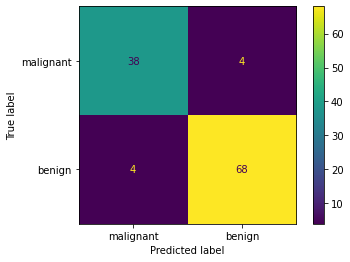

Normalized


<Figure size 1080x360 with 0 Axes>

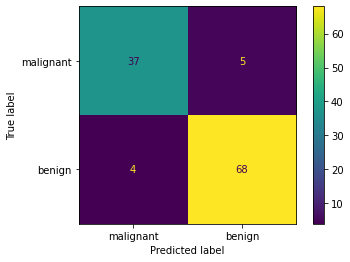

Standardized


<Figure size 1080x360 with 0 Axes>

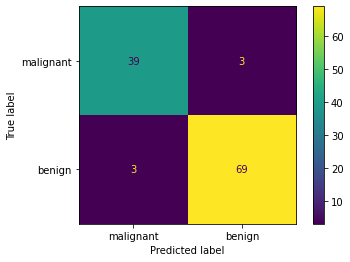

In [41]:
matrix_dtc = confusion_matrix(y_true = y_test,
                          y_pred = y_dtc_predict,
                          labels=breast_cancer.target_names)

matrix_dtc_normalized = confusion_matrix(y_true = y_test,
                                     y_pred = y_dtc_predict_normalized,
                                     labels=breast_cancer.target_names)

matrix_dtc_standardized = confusion_matrix(y_true = y_test,
                                       y_pred = y_dtc_predict_standardized,
                                       labels=breast_cancer.target_names)

matrix_array = [matrix_dtc, matrix_dtc_normalized, matrix_dtc_standardized]
matrix_names = ['Dataset', 'Normalized', 'Standardized']

for i in range(len(matrix_array)):
    figure = plt.figure(figsize=(15, 5))
    print(matrix_names[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix_array[i], display_labels=breast_cancer.target_names )
    disp.plot(values_format='d')
    plt.show()

## RANDOM FOREST
    • A melhor forma seria testas todas as árvores possíveis, mas impossibilitado pelo nível computacional
    • Para evitar overfiting, as árvores usam técnicas de poda:
        - PODA PRÉVIA: parar a construção da árvore cedo dado um limiar (dificuldade em escolher o melhor limiar)
        - PODA POSTERIOR: remover ramos depois da árvore estar pronta usando conjunto de dados
    • Uma forma interessante de melhorar a performance de uma Árvore de Decisão é criar um conjunto de árvores possíveis e usar a moda das predições

In [42]:
from sklearn.ensemble import RandomForestClassifier

# SEM TRANSFORMAÇÃO
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_rf_predict = rf.predict(x_test) 

# NORMALIZADO
rf.fit(x_train_normalized, y_train)
y_rf_predict_normalized = rf.predict(x_test_normalized) 

# PADRONIZADO
rf.fit(x_train_standardized, y_train)
y_rf_predict_standardized = rf.predict(x_test_standardized) 

Dataset


<Figure size 1080x360 with 0 Axes>

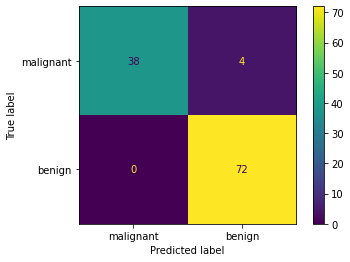

Normalized


<Figure size 1080x360 with 0 Axes>

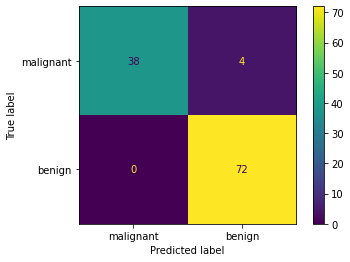

Standardized


<Figure size 1080x360 with 0 Axes>

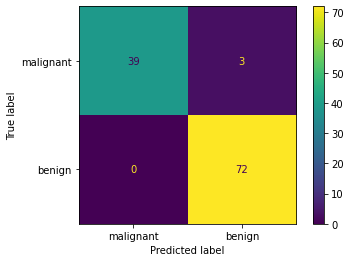

In [43]:
matrix_rf = confusion_matrix(y_true = y_test,
                          y_pred = y_rf_predict,
                          labels=breast_cancer.target_names)

matrix_rf_normalized = confusion_matrix(y_true = y_test,
                                     y_pred = y_rf_predict_normalized,
                                     labels=breast_cancer.target_names)

matrix_rf_standardized = confusion_matrix(y_true = y_test,
                                       y_pred = y_rf_predict_standardized,
                                       labels=breast_cancer.target_names)

matrix_array = [matrix_rf, matrix_rf_normalized, matrix_rf_standardized]
matrix_names = ['Dataset', 'Normalized', 'Standardized']

for i in range(len(matrix_array)):
    figure = plt.figure(figsize=(15, 5))
    print(matrix_names[i])
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix_array[i], display_labels=breast_cancer.target_names )
    disp.plot(values_format='d')
    plt.show()